In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import sympy as sp
V0 = sp.symbols('V0')
fai0 = sp.symbols('fai0')
fai0 = -0.0483546875000000

In [2]:
def NP_EI(x_in):
    I = 0.012*0.05**3/12
    E = 1e4/I*0.001
    cond1 = np.logical_and(np.greater_equal(x_in, 0), np.less(x_in, 0.5))
    f1 = E*I*np.ones_like(x_in)
    f2 = 0.5*E*I*np.ones_like(x_in)
    f = np.where(cond1, f1, f2)
    return f

In [3]:
d1 = 0.35
d2 = 0.50
d3 = 0.65
L = 1
I = 0.012*0.05**3/12
E1 = 1e4/I*0.001
E2 = 0.5*1e4/I*0.001
EI1 = E1*I
EI2 = E2*I
x1 = np.arange(0,d1,0.001).reshape(-1,1)
x2 = np.arange(d1,d2-0.001,0.001).reshape(-1,1)
x3 = np.arange(d2,d3-0.001,0.001).reshape(-1,1)
x4 = np.arange(d3,L+0.001,0.001).reshape(-1,1)
X1 = np.vstack((x1,x2,x3,x4))

In [18]:
EI_real = EI1

In [4]:
EI_exact = NP_EI(X1)

In [5]:
x = sp.symbols('x')
Q1_sym = 0*x
Q2_sym = 0*x+20
Q3_sym = 0*x+20
Q4_sym = 0*x

V1_sym = integrate(-Q1_sym, (x, 0, x  ))
V2_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, x))
V3_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, d2))+integrate(-Q3_sym, (x, d2, x))
V4_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, d2))+integrate(-Q3_sym, (x, d2, d3))+\
            integrate(-Q4_sym, (x, d3, x))


M1_sym = integrate(V1_sym, (x, 0, x  ))
M2_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, x))
M3_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, d2))+integrate(V3_sym, (x, d2, x))
M4_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, d2))+\
            integrate(V3_sym, (x, d2, d3))+integrate(V4_sym, (x, d3, x))


fai1_sym = integrate(M1_sym, (x, 0, x  )) + fai0
fai2_sym = integrate(M1_sym, (x, 0, d1))+integrate(M2_sym, (x, d1, x)) + fai0
fai3_sym = integrate(M1_sym, (x, 0, d1))+integrate(M2_sym, (x, d1, d2))+integrate(M3_sym, (x, d2, x)) + fai0
fai4_sym = integrate(M1_sym, (x, 0, d1))+integrate(M2_sym, (x, d1, d2))+integrate(M3_sym, (x, d2, d3))\
           + integrate(M4_sym, (x, d3, x)) + fai0

W1_sym = integrate(-fai1_sym, (x, 0, x  ))
W2_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, x))
W3_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, d2))+integrate(-fai3_sym, (x, d2, x))
W4_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, d2))+integrate(-fai3_sym, (x, d2, d3))\
        +integrate(-fai4_sym, (x, d3, x))

In [6]:
M1_func = sp.lambdify(x, M1_sym, 'numpy')
M2_func = sp.lambdify(x, M2_sym, 'numpy')
M3_func = sp.lambdify(x, M3_sym, 'numpy')
M4_func = sp.lambdify(x, M4_sym, 'numpy')

M1 = M1_func(x1)
M2 = M2_func(x2)
M3 = M3_func(x3)
M4 = M3_func(x4)
M = np.vstack((M1,M2,M3,M4))
M[-1][0]

V1_func = sp.lambdify(x, V1_sym, 'numpy')
V2_func = sp.lambdify(x, V2_sym, 'numpy')
V3_func = sp.lambdify(x, V3_sym, 'numpy')
V4_func = sp.lambdify(x, V4_sym, 'numpy')
V1 = V1_func(x1)
V2 = V2_func(x2)
V3 = V3_func(x3)
V4 = V4_func(x4)
V = np.vstack((V1,V2,V3,V4))
V[-1][0]

-6.0

In [7]:
dis = 1/3
l = 0.75
L = 1
x = sp.symbols('x')
Q1_sym = 0*x
Q2_sym = 0*x+20
Q3_sym = 0*x+20
Q4_sym = 0*x

V1_sym = integrate(-Q1_sym, (x, 0, x  ))-0.5*V[-1][0]
V2_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, x))-0.5*V[-1][0]
V3_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, d2))+integrate(-Q3_sym, (x, d2, x))-0.5*V[-1][0]
V4_sym = integrate(-Q1_sym, (x, 0, d1))+integrate(-Q2_sym, (x, d1, d2))+integrate(-Q3_sym, (x, d2, d3))\
            +integrate(-Q4_sym, (x, d3, x))-0.5*V[-1][0]

M1_sym = integrate(V1_sym, (x, 0, x  ))
M2_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, x))
M3_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, d2))+integrate(V3_sym, (x, d2, x))
M4_sym = integrate(V1_sym, (x, 0, d1))+integrate(V2_sym, (x, d1, d2))+integrate(V3_sym, (x, d2, d3))+\
          integrate(V4_sym, (x, d3, x))

fai1_sym = (integrate(M1_sym, (x, 0,  x )))/EI1 + fai0
fai2_sym = (integrate(M1_sym, (x, 0,  d1)))/EI1 + \
           (integrate(M2_sym, (x, d1, x )))/EI1 + fai0
fai3_sym = (integrate(M1_sym, (x, 0,  d1)))/EI1 + \
           (integrate(M2_sym, (x, d1, d2)))/EI1 + \
           (integrate(M3_sym, (x, d2,  x)))/EI2 + fai0
fai4_sym = (integrate(M1_sym, (x, 0,  d1)))/EI1 + \
           (integrate(M2_sym, (x, d1, d2)))/EI1 + \
           (integrate(M3_sym, (x, d2, d3)))/EI2 + \
           (integrate(M4_sym, (x, d3, x )))/EI2 + fai0

W1_sym = integrate(-fai1_sym, (x, 0, x  ))
W2_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, x))
W3_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, d2))+integrate(-fai3_sym, (x, d2, x))
W4_sym = integrate(-fai1_sym, (x, 0, d1))+integrate(-fai2_sym, (x, d1, d2))+integrate(-fai3_sym, (x, d2, d3))\
        +integrate(-fai4_sym, (x, d3, x))

In [8]:
known_values = {x: 1, W4_sym: 0}

# 解方程
solution = sp.solve(W4_sym.subs(x, known_values[x]) - known_values[W4_sym], fai0)
print(solution)

[]


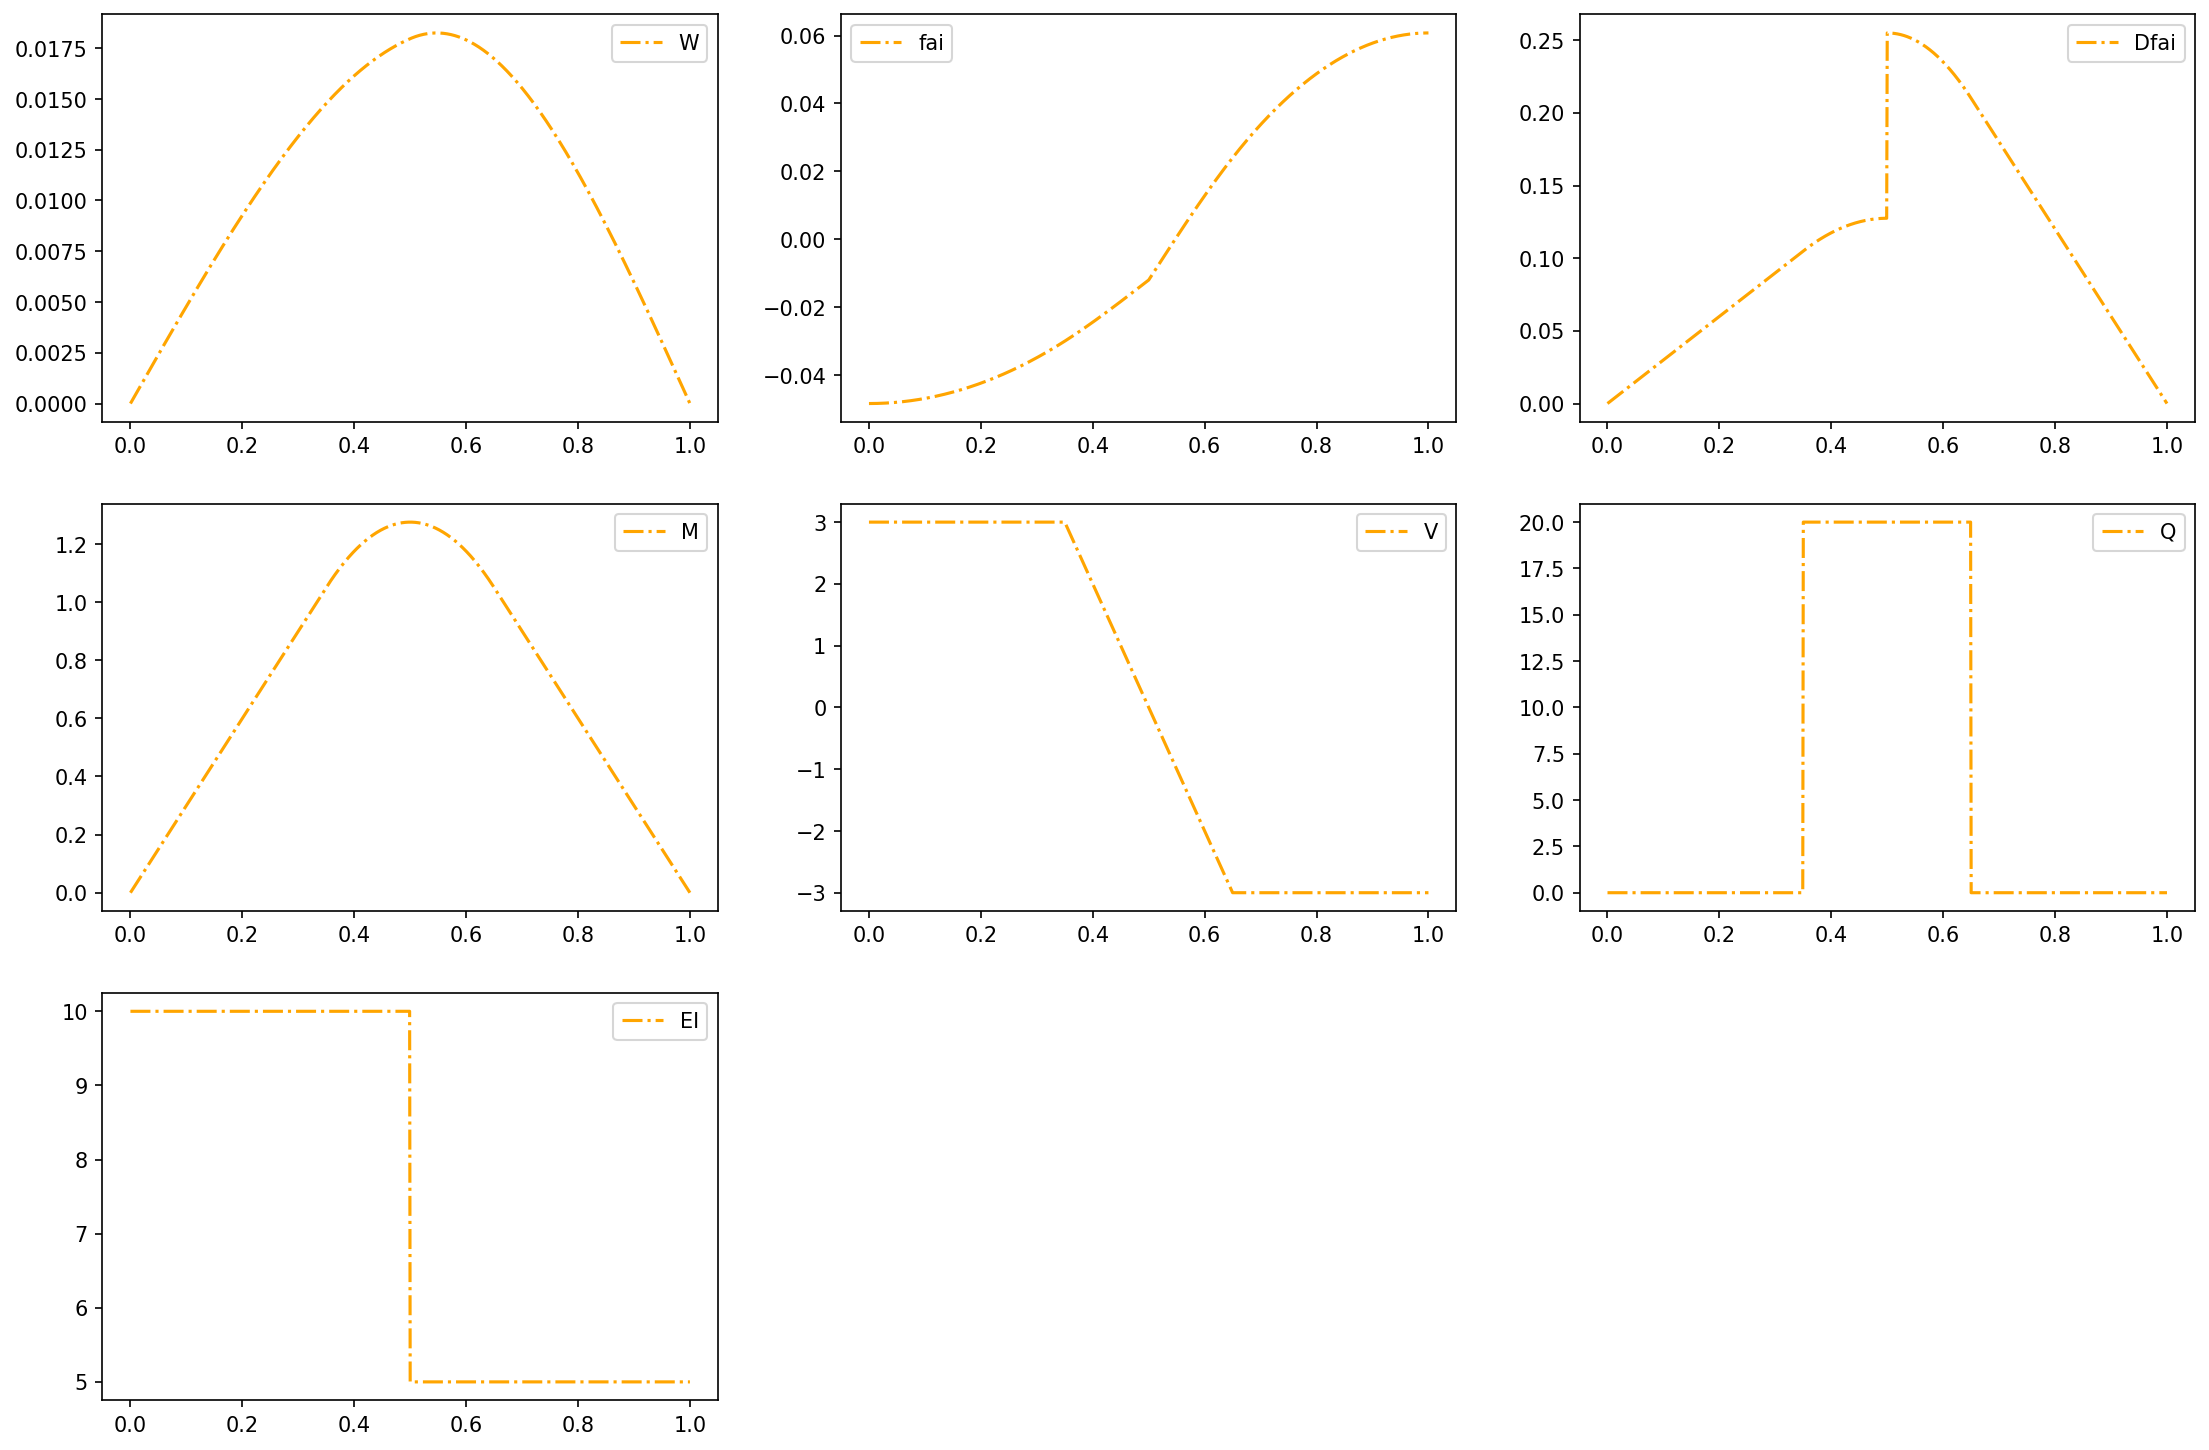

In [24]:
Q1_func = sp.lambdify(x, Q1_sym, 'numpy')
Q2_func = sp.lambdify(x, Q2_sym, 'numpy')
Q3_func = sp.lambdify(x, Q3_sym, 'numpy')
Q4_func = sp.lambdify(x, Q4_sym, 'numpy')

V1_func = sp.lambdify(x, V1_sym, 'numpy')
V2_func = sp.lambdify(x, V2_sym, 'numpy')
V3_func = sp.lambdify(x, V3_sym, 'numpy')
V4_func = sp.lambdify(x, V4_sym, 'numpy')

M1_func = sp.lambdify(x, M1_sym, 'numpy')
M2_func = sp.lambdify(x, M2_sym, 'numpy')
M3_func = sp.lambdify(x, M3_sym, 'numpy')
M4_func = sp.lambdify(x, M4_sym, 'numpy')

fai1_func = sp.lambdify(x, fai1_sym, 'numpy')
fai2_func = sp.lambdify(x, fai2_sym, 'numpy')
fai3_func = sp.lambdify(x, fai3_sym, 'numpy')
fai4_func = sp.lambdify(x, fai4_sym, 'numpy')

W1_func = sp.lambdify(x, W1_sym, 'numpy')
W2_func = sp.lambdify(x, W2_sym, 'numpy')
W3_func = sp.lambdify(x, W3_sym, 'numpy')
W4_func = sp.lambdify(x, W4_sym, 'numpy')

Q1 = x1*0
Q2 = x2*0+20
Q3 = x3*0+20
Q4 = x4*0
ddddWW1 = np.vstack((Q1,Q2,Q3,Q4))

V1 = x1*0+V1_func(x1)
V2 = V2_func(x2)
V3 = V3_func(x3)
V4 = x4*0+V4_func(x4)
dddWW1 = np.vstack((V1,V2,V3,V4))

M1 = M1_func(x1)
M2 = M2_func(x2)
M3 = M3_func(x3)
M4 = M4_func(x4)
ddWW1 = np.vstack((M1,M2,M3,M4))

fai1 = fai1_func(x1)
fai2 = fai2_func(x2)
fai3 = fai3_func(x3)
fai4 = fai4_func(x4)
dWW1 = np.vstack((fai1,fai2,fai3,fai4))

W1 = W1_func(x1)
W2 = W2_func(x2)
W3 = W3_func(x3)
W4 = W4_func(x4)
WW1 = np.vstack((W1,W2,W3,W4))

dfai_real = np.vstack((M1/EI1,M2/EI1,M3/EI2,M4/EI2))

plt.figure(figsize=(18,12),dpi=150)
plt.subplot(3,3,1)
# plt.vlines(0.75,-0.05,0.15)
# plt.hlines(0,0.6,0.8)
plt.plot(X1,WW1,label="W", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(3,3,2)
plt.plot(X1,dWW1,label="fai", linestyle='dashdot', color='orange')
plt.legend()

plt.subplot(3,3,3)
plt.plot(X1,dfai_real,label="Dfai", linestyle='dashdot', color='orange')
plt.legend()

plt.subplot(3, 3, 4)
plt.plot(X1,ddWW1,label="M", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(3, 3, 5)
plt.plot(X1,dddWW1,label="V", linestyle='dashdot', color='orange')
plt.legend()
plt.subplot(3, 3, 6)
plt.plot(X1,ddddWW1,label="Q", linestyle='dashdot', color='orange')
plt.legend()

plt.subplot(3, 3, 7)
plt.plot(X1,EI_exact,label="EI", linestyle='dashdot', color='orange')
plt.legend()

In [10]:
ddWW1

array([[ 0.00000000e+00],
       [ 3.00000000e-03],
       [ 6.00000000e-03],
       ...,
       [ 6.00000000e-03],
       [ 3.00000000e-03],
       [-1.33226763e-15]])

In [12]:
ddfai1 = M1/EI1
ddfai2 = M2/EI1
ddfai3 = M3/EI2
ddfai4 = M4/EI2